In [44]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_rows",21)
import warnings
warnings.filterwarnings("ignore")

# Project
## IMDB Top 250 Movies Analysis

In [45]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\imdb_top_movies.csv")

# Data Info 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         250 non-null    int64  
 1   Title        250 non-null    object 
 2   Year         250 non-null    int64  
 3   Rating       250 non-null    float64
 4   Duration     250 non-null    object 
 5   Certificate  245 non-null    object 
 6   Genres       250 non-null    object 
 7   Description  250 non-null    object 
 8   Image URL    250 non-null    object 
 9   Movie URL    250 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


In [47]:
df.head()

,Rank,Title,Year,Rating,Duration,Certificate,Genres,Description,Image URL,Movie URL
0,1,The Shawshank Redemption,1994,9.3,2h 22m,R,Drama,"A banker convicted of uxoricide forms a friendship over a quarter century with a hardened convict, while maintaining his innocence and trying to remain hopeful through simple compassion.",https://m.media-amazon.com/images/M/MV5BMDAyY2FhYjctNDc5OS00MDNlLThiMGUtY2UxYWVkNGY2ZjljXkEyXkFqcGc@._V1_.jpg,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,1972,9.2,2h 55m,R,"Crime, Drama",The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,https://m.media-amazon.com/images/M/MV5BNGEwYjgwOGQtYjg5ZS00Njc1LTk2ZGEtM2QwZWQ2NjdhZTE5XkEyXkFqcGc@._V1_.jpg,https://www.imdb.com/title/tt0068646/
2,3,The Dark Knight,2008,9.1,2h 32m,PG-13,"Action, Crime, Drama","When a menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman, James Gordon and Harvey Dent must work together to put an end to the madness.",https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_.jpg,https://www.imdb.com/title/tt0468569/
3,4,The Godfather Part II,1974,9.0,3h 22m,R,"Crime, Drama","The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",https://m.media-amazon.com/images/M/MV5BMDIxMzBlZDktZjMxNy00ZGI4LTgxNDEtYWRlNzRjMjJmOGQ1XkEyXkFqcGc@._V1_.jpg,https://www.imdb.com/title/tt0071562/
4,5,12 Angry Men,1957,9.0,1h 36m,Approved,"Crime, Drama",The jury in a New York City murder trial is frustrated by a single member whose skeptical caution forces them to more carefully consider the evidence before jumping to a hasty verdict.,https://m.media-amazon.com/images/M/MV5BYjE4NzdmOTYtYjc5Yi00YzBiLWEzNDEtNTgxZGQ2MWVkN2NiXkEyXkFqcGc@._V1_.jpg,https://www.imdb.com/title/tt0050083/


# Data Cleaning & Handling 

In [48]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [49]:
df.drop(columns=["Description","Image URL","Movie URL"],inplace=True)

In [50]:
df.rename({"Rank":"Movie Rank"},axis=1,inplace=True)

## Which year movies got the most highest ratings?

In [66]:
hi_yr=df[df["Rating"]>=9.0]
hi_yr.style.background_gradient(cmap="Reds")


,Movie Rank,Title,Year,Rating,Duration,Certificate,Genres
0,1,The Shawshank Redemption,1994,9.300000,2h 22m,R,Drama
1,2,The Godfather,1972,9.200000,2h 55m,R,"Crime, Drama"
2,3,The Dark Knight,2008,9.100000,2h 32m,PG-13,"Action, Crime, Drama"
3,4,The Godfather Part II,1974,9.000000,3h 22m,R,"Crime, Drama"
4,5,12 Angry Men,1957,9.000000,1h 36m,Approved,"Crime, Drama"
5,6,The Lord of the Rings: The Return of the King,2003,9.000000,3h 21m,PG-13,"Adventure, Drama, Fantasy"
6,7,Schindler's List,1993,9.000000,3h 15m,R,"Biography, Drama, History"


In [67]:
fig=px.bar(hi_yr,x="Title",y="Year",hover_data=["Genres","Movie Rank"])
fig.show()

## Certification Distributions

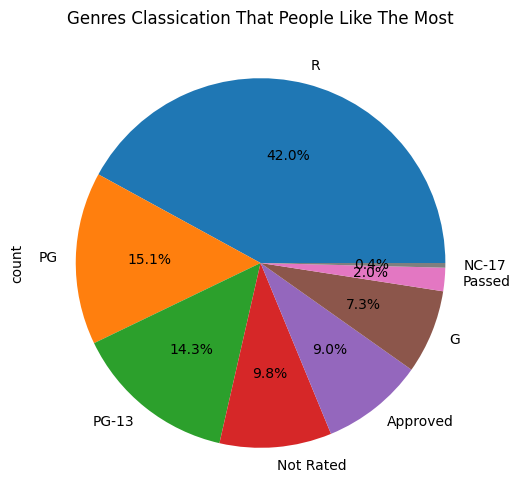

In [73]:
cr_d = df["Certificate"].value_counts().plot(
    kind="pie",
    figsize=(12, 6),
    autopct="%1.1f%%",
    title="Genres Classication That People Like The Most"
)

In [ ]:
df.head()

,Movie Rank,Title,Year,Rating,Duration,Certificate,Genres
0,1,The Shawshank Redemption,1994,9.3,2h 22m,R,Drama
1,2,The Godfather,1972,9.2,2h 55m,R,"Crime, Drama"
2,3,The Dark Knight,2008,9.1,2h 32m,PG-13,"Action, Crime, Drama"
3,4,The Godfather Part II,1974,9.0,3h 22m,R,"Crime, Drama"
4,5,12 Angry Men,1957,9.0,1h 36m,Approved,"Crime, Drama"


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Rank   250 non-null    int64  
 1   Title        250 non-null    object 
 2   Year         250 non-null    int64  
 3   Rating       250 non-null    float64
 4   Duration     250 non-null    object 
 5   Certificate  245 non-null    object 
 6   Genres       250 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 13.8+ KB


In [81]:
df["Title"].value_counts()

Title
The Shawshank Redemption    1
The Godfather               1
The Dark Knight             1
The Godfather Part II       1
12 Angry Men                1
                           ..
The Grapes of Wrath         1
To Be or Not to Be          1
Gangs of Wasseypur          1
Drishyam                    1
The Help                    1
Name: count, Length: 250, dtype: int64

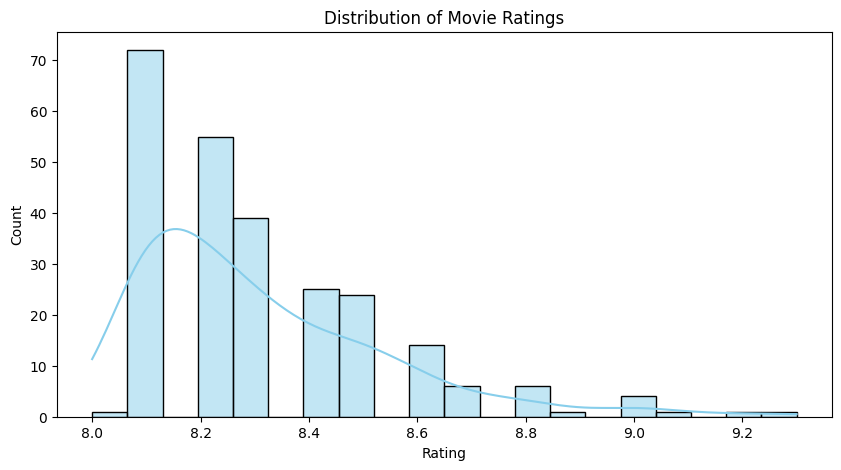

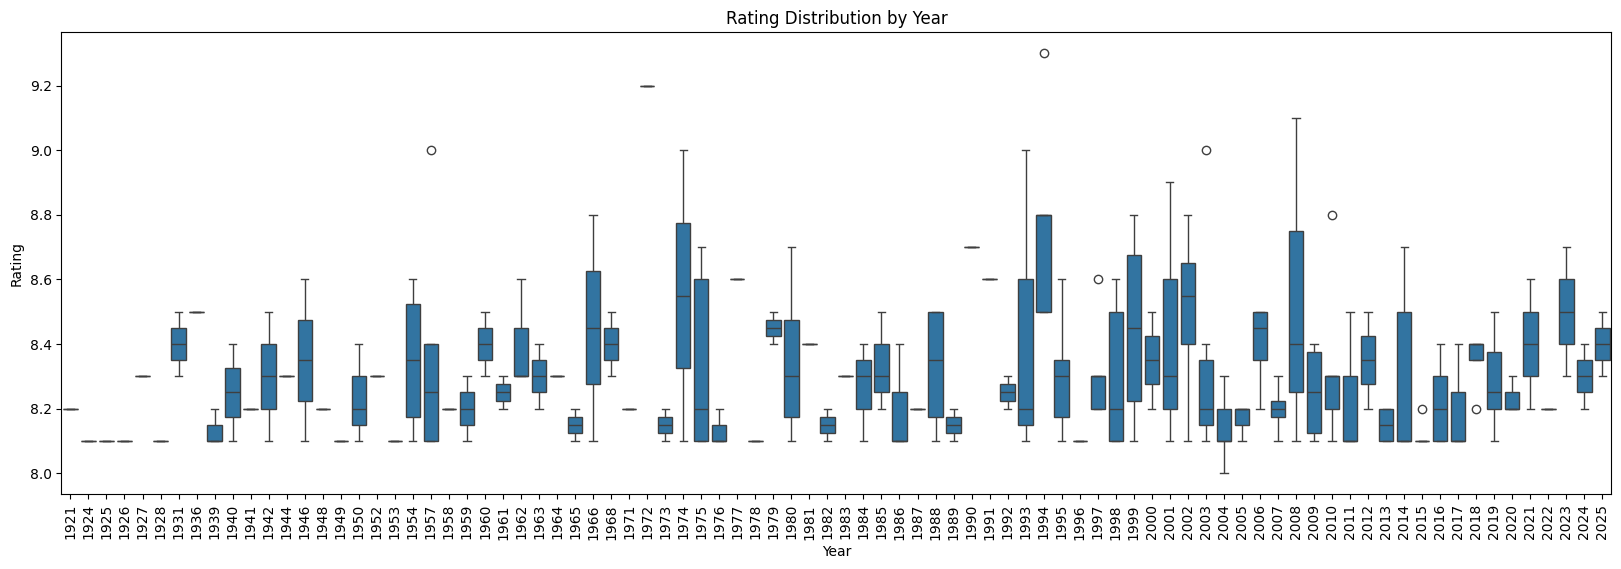

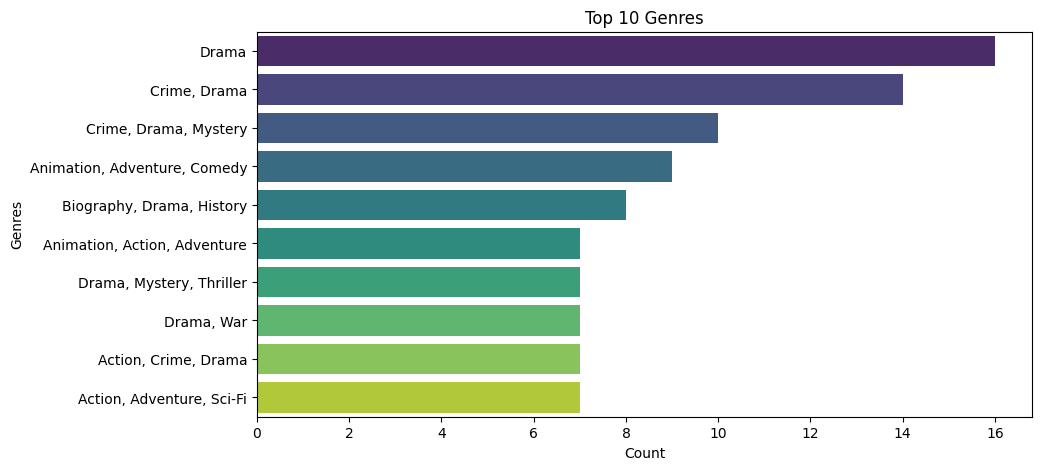

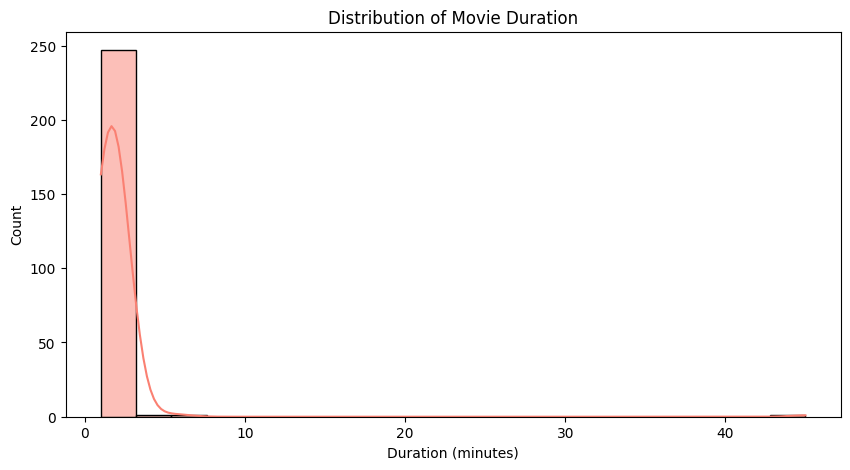

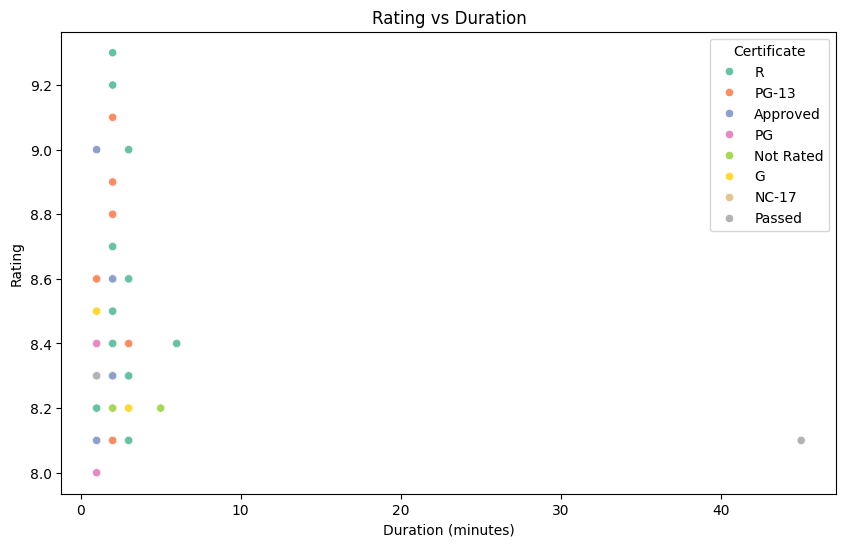

In [80]:
# Distribution of Ratings
plt.figure(figsize=(10, 5))
sns.histplot(df["Rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Rating vs Year
plt.figure(figsize=(20, 6))
sns.boxplot(x="Year", y="Rating", data=df)
plt.xticks(rotation=90)
plt.title("Rating Distribution by Year")
plt.show()

# Top 10 Genres (Bar Plot)
top_genres = df["Genres"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

# Duration Cleanup and Distribution
df["Duration_min"] = df["Duration"].str.extract("(\d+)").astype(float)
plt.figure(figsize=(10, 5))
sns.histplot(df["Duration_min"], bins=20, color="salmon", kde=True)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

# Rating vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Duration_min", y="Rating", data=df, hue="Certificate", palette="Set2")
plt.title("Rating vs Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Rating")
plt.legend(title="Certificate")
plt.show()


In [82]:
df.head()

,Movie Rank,Title,Year,Rating,Duration,Certificate,Genres,Duration_min
0,1,The Shawshank Redemption,1994,9.3,2h 22m,R,Drama,2.0
1,2,The Godfather,1972,9.2,2h 55m,R,"Crime, Drama",2.0
2,3,The Dark Knight,2008,9.1,2h 32m,PG-13,"Action, Crime, Drama",2.0
3,4,The Godfather Part II,1974,9.0,3h 22m,R,"Crime, Drama",3.0
4,5,12 Angry Men,1957,9.0,1h 36m,Approved,"Crime, Drama",1.0
